**Import Libraries**

In [51]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

**Read dataset**

In [52]:
data = pd.read_csv('income_evaluation.csv')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


****checking columns data types****

In [53]:
data.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [54]:
data.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [55]:
data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [56]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**delete space in columns of the dataset**

In [57]:
data = data.rename(columns=lambda x: x.strip())

Find ? and replace it to np.nan for imputer

In [58]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [59]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [60]:
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [61]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [62]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [63]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [64]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [65]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [66]:
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [67]:
data[data == ' ?'] = np.nan
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [68]:
data.shape

(32561, 15)

In [69]:
data.drop(['education-num'], axis=1, inplace=True)

Data Analysis

Jumlah laki-laki: 21790
Jumlah perempuan: 10771


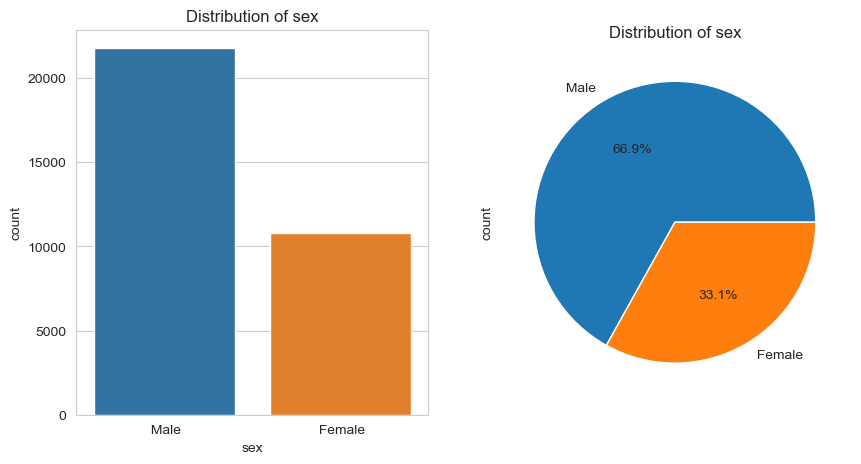

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(data=data, x='sex', ax=ax[0])
ax[0].set_title('Distribution of sex')

data['sex'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('Distribution of sex')

male = data['sex'].value_counts()[' Male']

female = data['sex'].value_counts()[' Female']

print(f'Jumlah laki-laki: {male}\nJumlah perempuan: {female}')

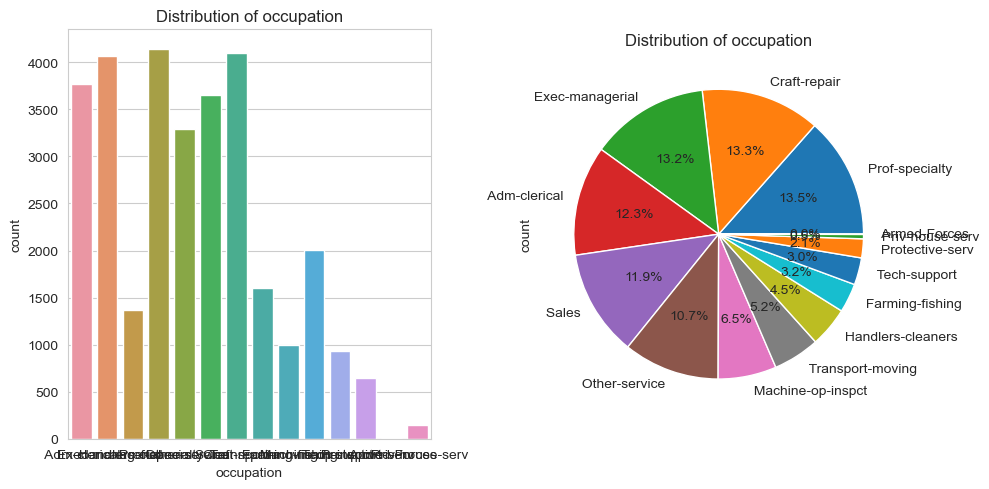

In [71]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

sns.countplot(data=data, x='occupation', ax=ax[0])
ax[0].set_title('Distribution of occupation')

data['occupation'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('Distribution of occupation')

plt.tight_layout()
plt.show()

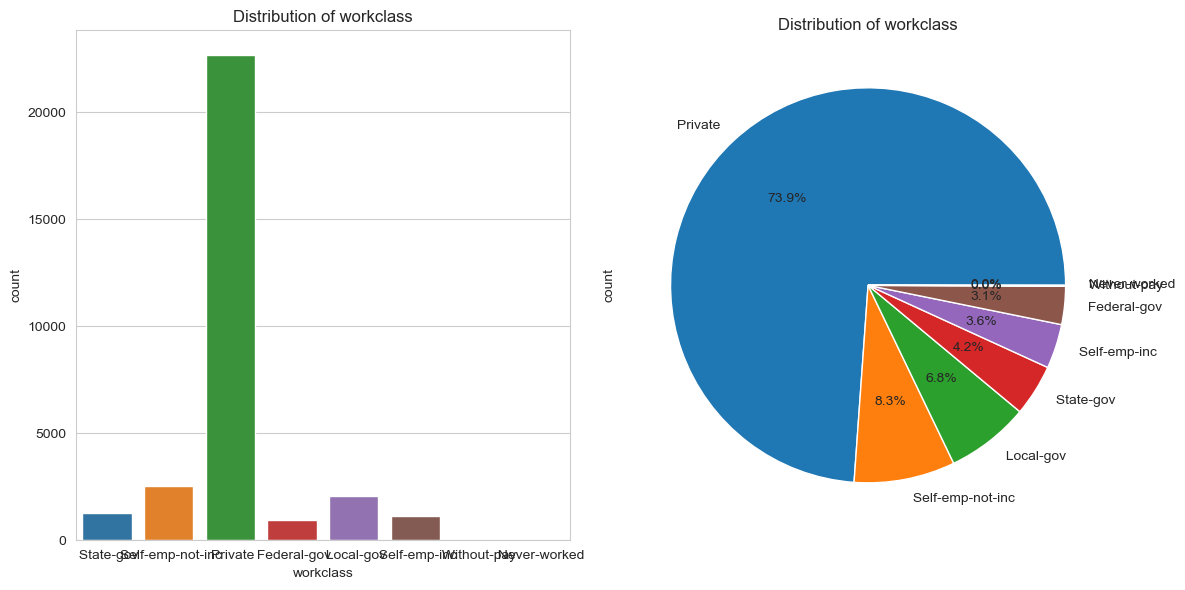

In [72]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

sns.countplot(data=data, x='workclass', ax=ax[0])
ax[0].set_title('Distribution of workclass')

data['workclass'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('Distribution of workclass')

plt.tight_layout()
plt.show()

by this pie chart, we can see clearly that more than 73% individuals in sample are private workclass

Text(0.5, 1.0, 'workclass vs income')

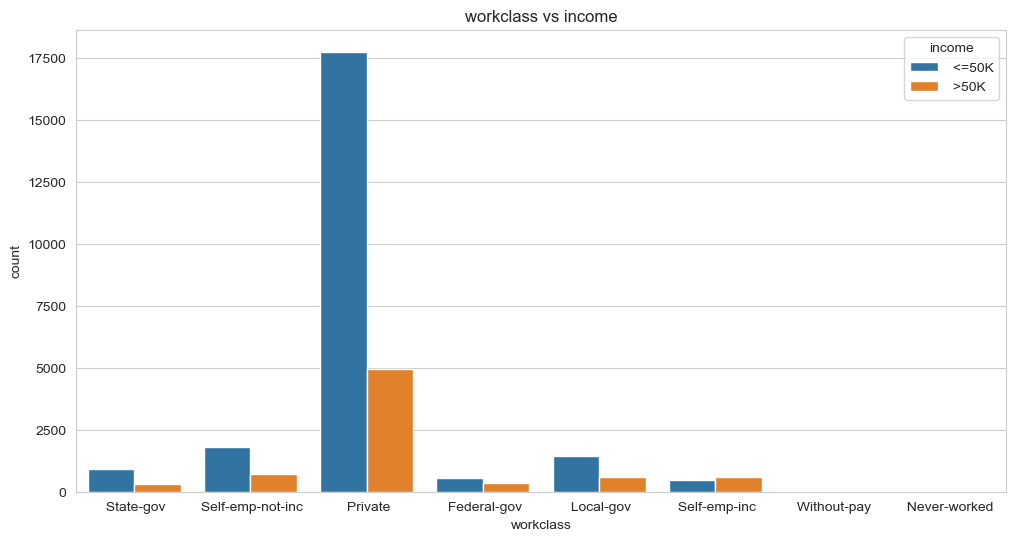

In [73]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='workclass', hue='income')
plt.title('workclass vs income')

we can see that most individuals in private workclass have <=50K income

Text(0.5, 1.0, 'workclass vs sex')

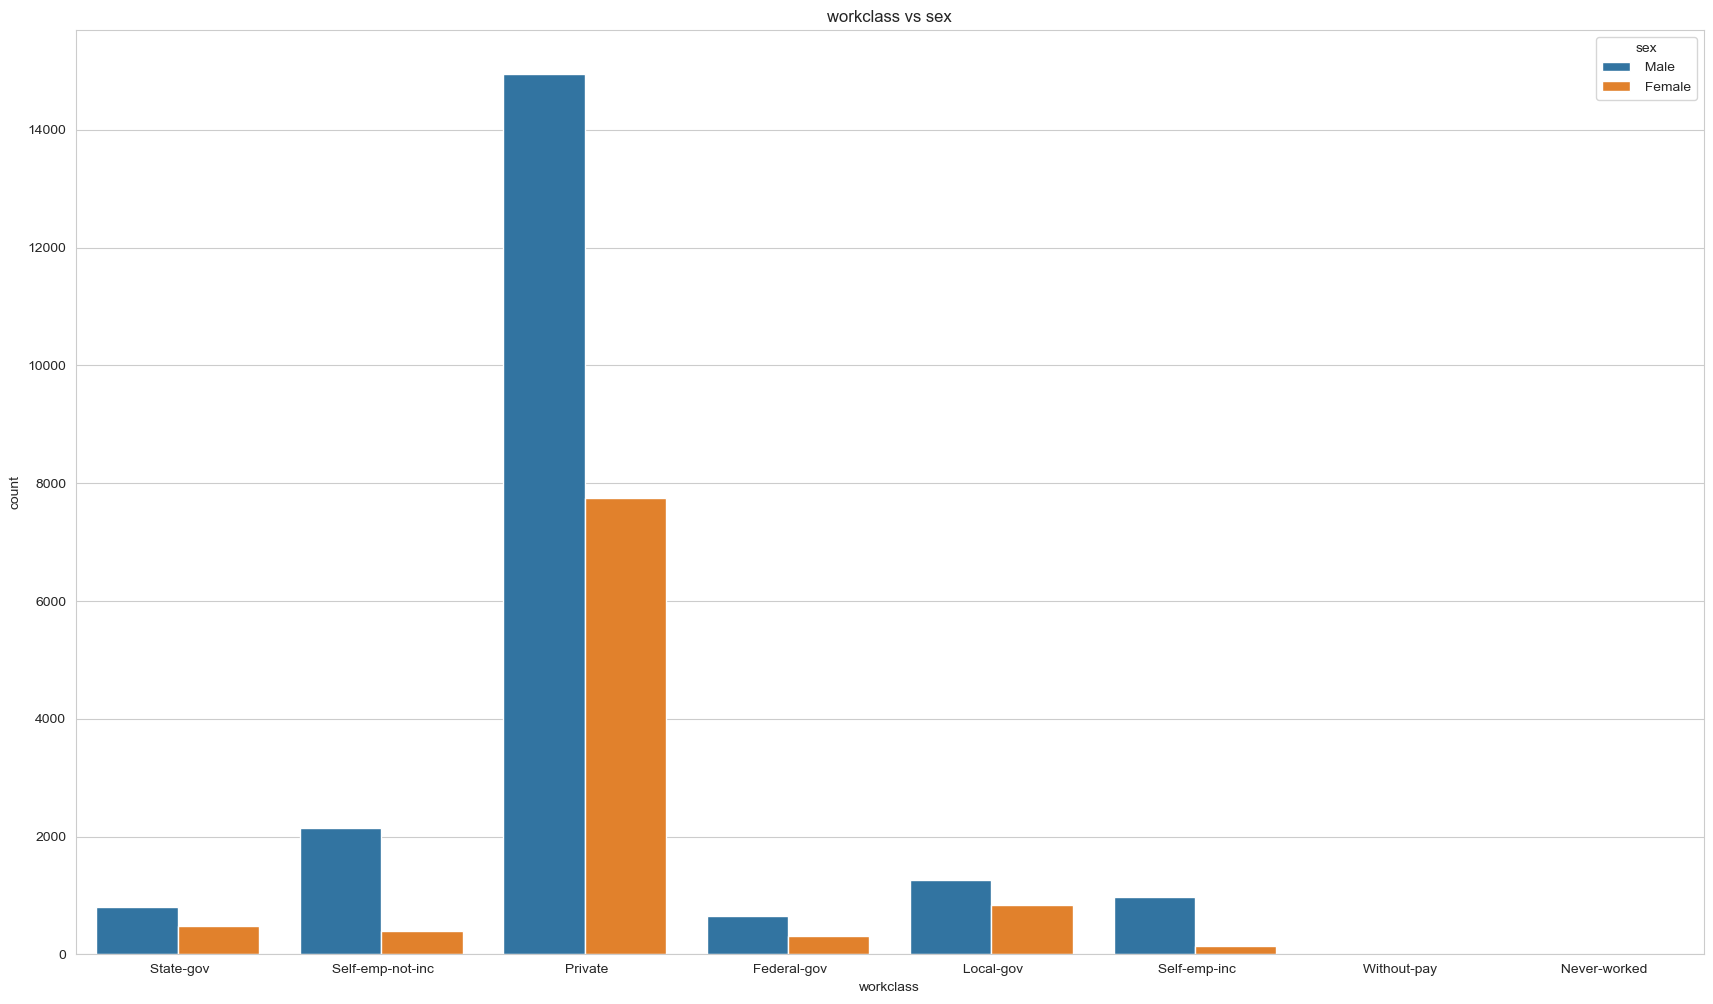

In [74]:
plt.figure(figsize=(21, 12))
sns.countplot(data= data, x='workclass', hue='sex')
plt.title('workclass vs sex')

most private workclass gender are male

Text(0.5, 1.0, 'income vs education')

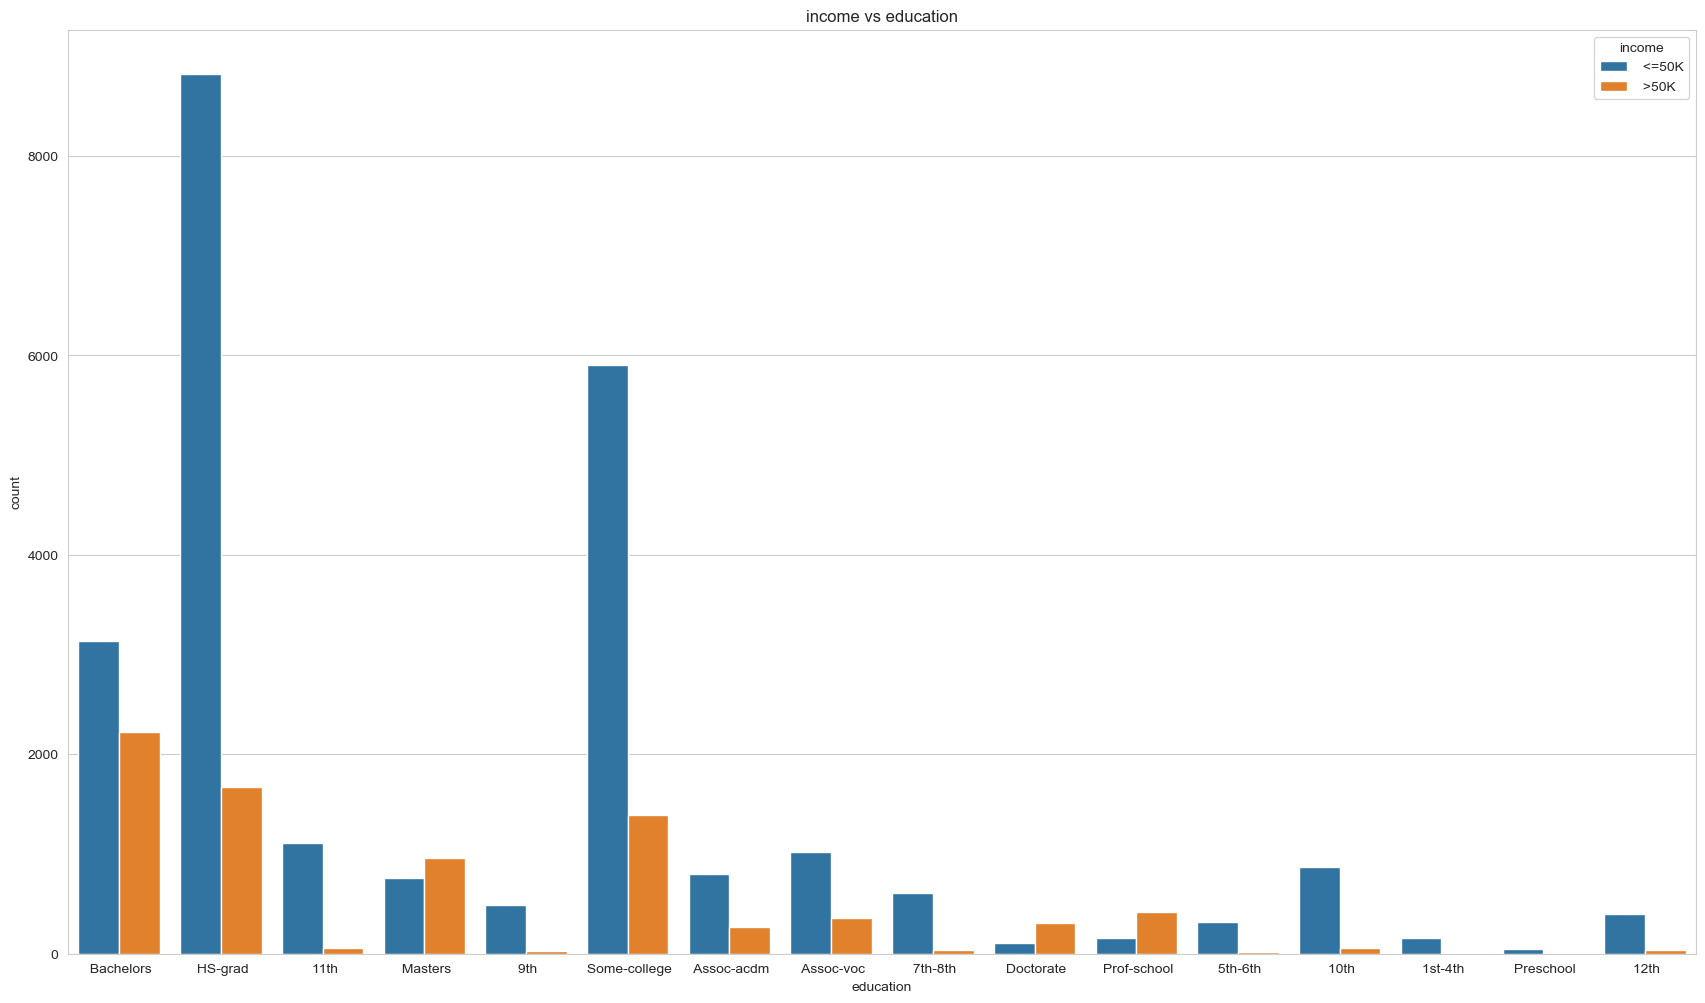

In [75]:
plt.figure(figsize=(21, 12))
sns.countplot(data= data, x='education', hue='income')
plt.title('income vs education')

high school graduate give highest <=50K income than other education

Text(0.5, 1.0, 'marital status vs sex')

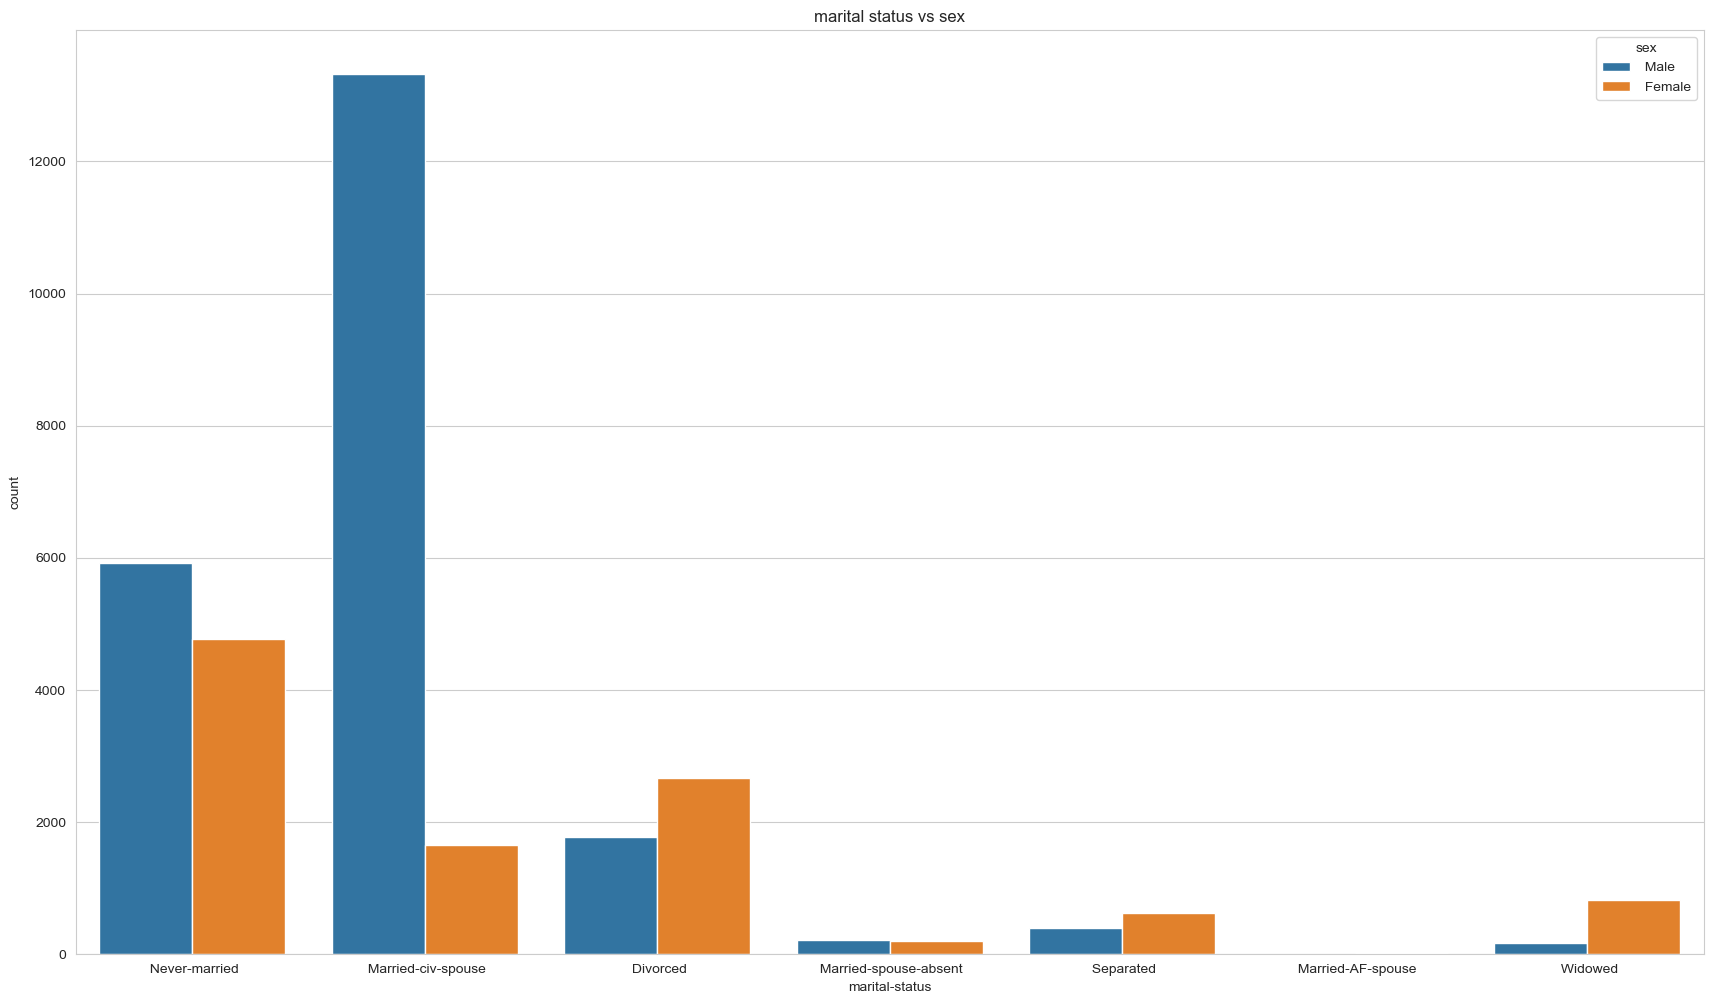

In [76]:
plt.figure(figsize=(21, 12))
sns.countplot(data= data, x='marital-status', hue='sex')
plt.title('marital status vs sex')

Text(0.5, 1.0, 'education vs sex')

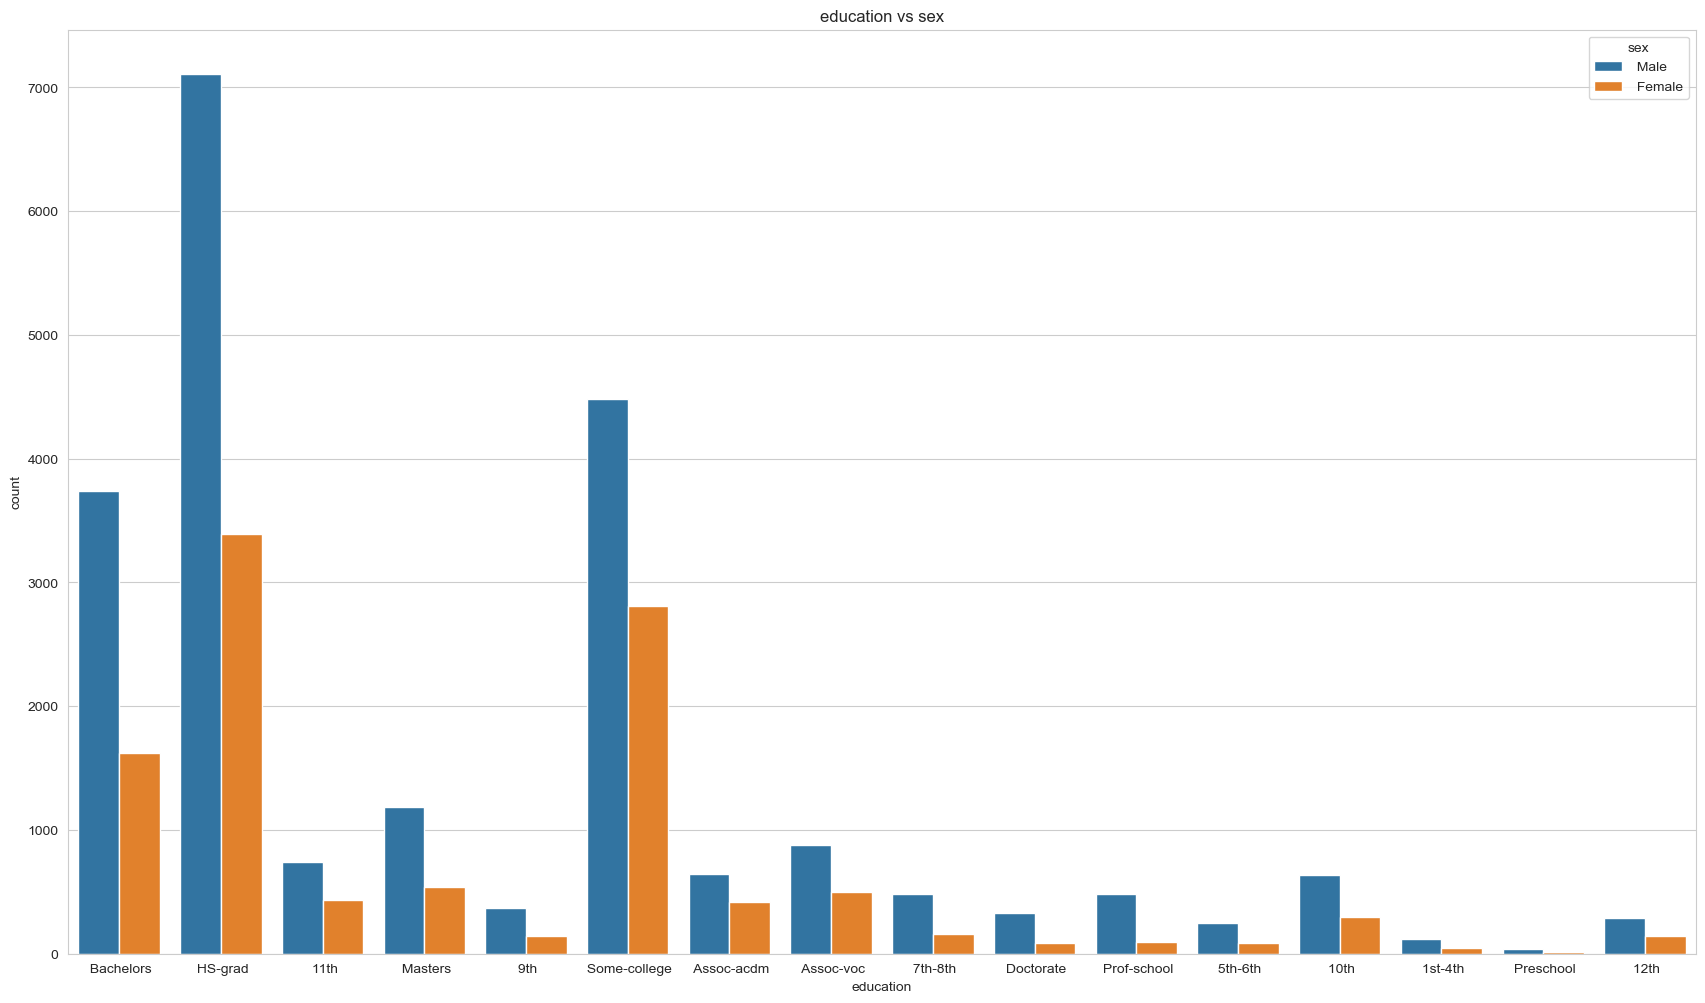

In [77]:
plt.figure(figsize=(21, 12))
sns.countplot(data= data, x='education', hue='sex')
plt.title('education vs sex')

<Axes: xlabel='relationship', ylabel='count'>

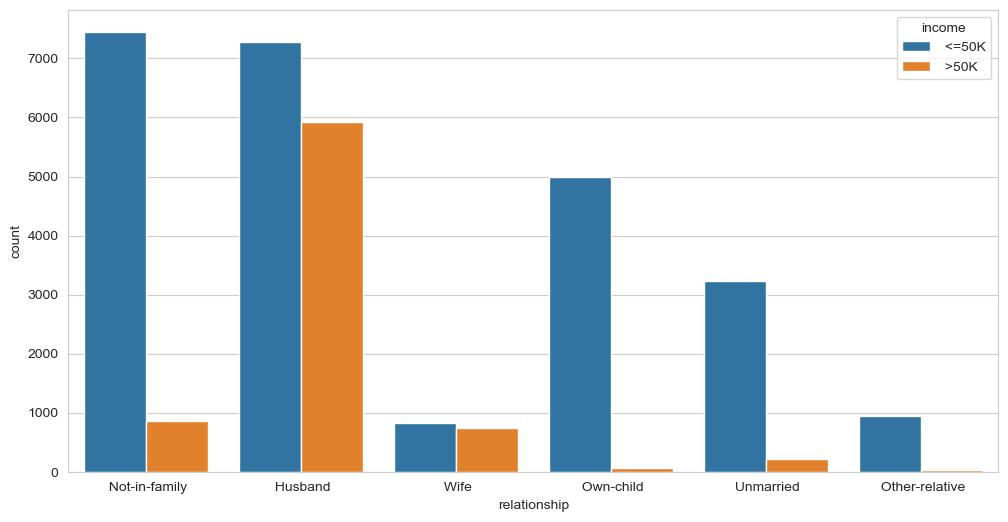

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='relationship', hue='income')

In [79]:
# 17 - 90 => 73 
# 73 / 7 = 7,3

# 17 - 31, 32 - 45, 46 - 60, 61 - 75, > 76

bins = [16, 32, 46, 61, 76, np.inf]
label = ['16 - 31', '32 - 45', '46 - 60', '61 - 75', '> 76']

data['range-age'] = pd.cut(data['age'], bins=bins, labels=label)
data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,range-age
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,32 - 45
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,46 - 60
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,32 - 45
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,46 - 60
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,16 - 31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,16 - 31
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,32 - 45
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,46 - 60
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,16 - 31


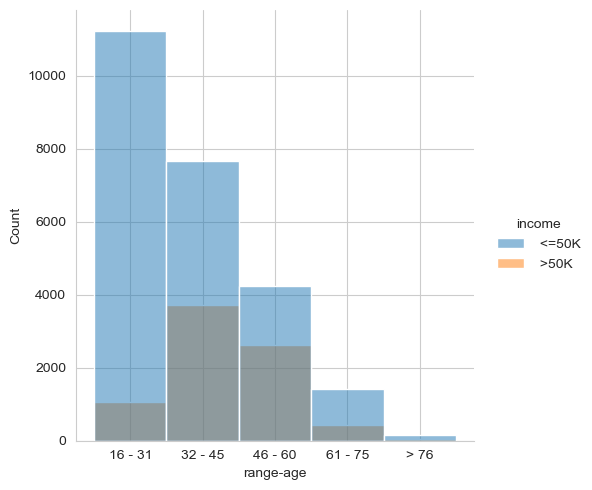

In [80]:
sns.displot(data=data, x='range-age', hue='income')

Text(0.5, 0, 'race and income')

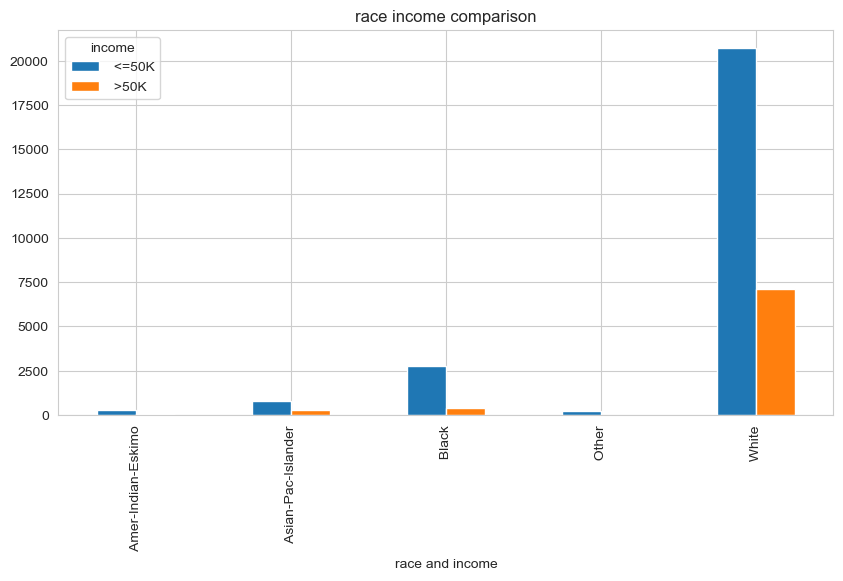

In [81]:
pd.crosstab(index=data['race'], columns=data['income']).plot(kind='bar', figsize=(10, 5))
plt.title('race income comparison')
plt.xlabel('race and income')

Text(0.5, 1.0, '')

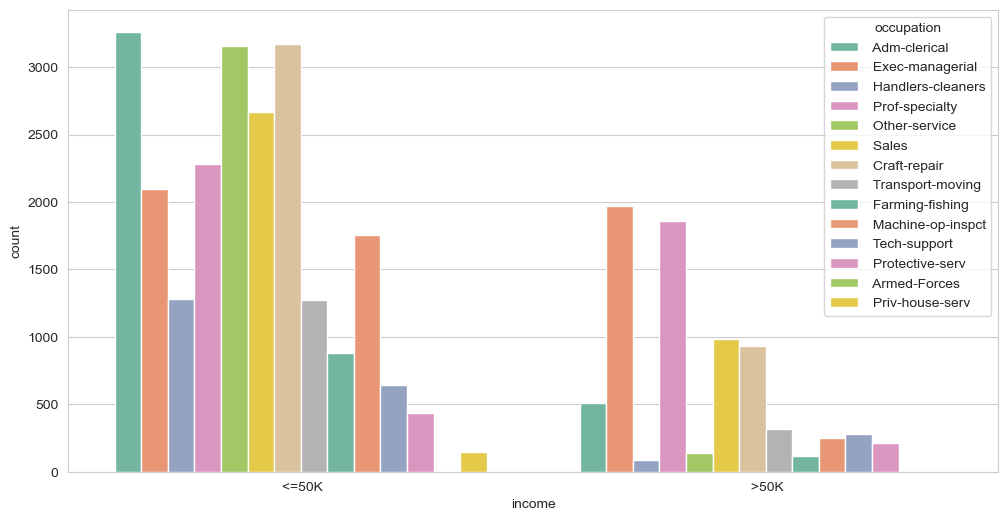

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='income', hue='occupation', palette='Set2')
plt.title('')

Text(0.5, 1.0, 'relationship vs income')

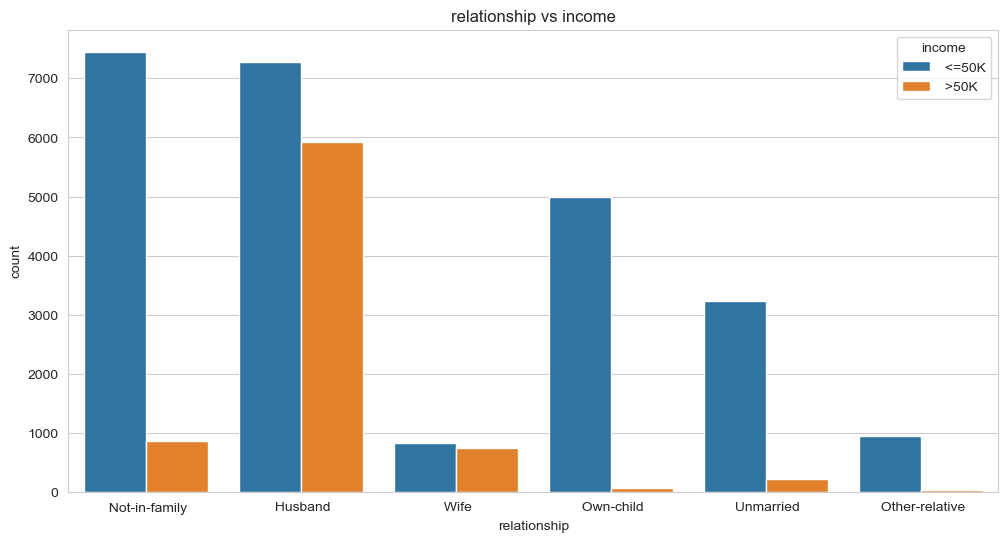

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='relationship', hue='income')
plt.title('relationship vs income')

Text(0.5, 1.0, 'income vs workclass')

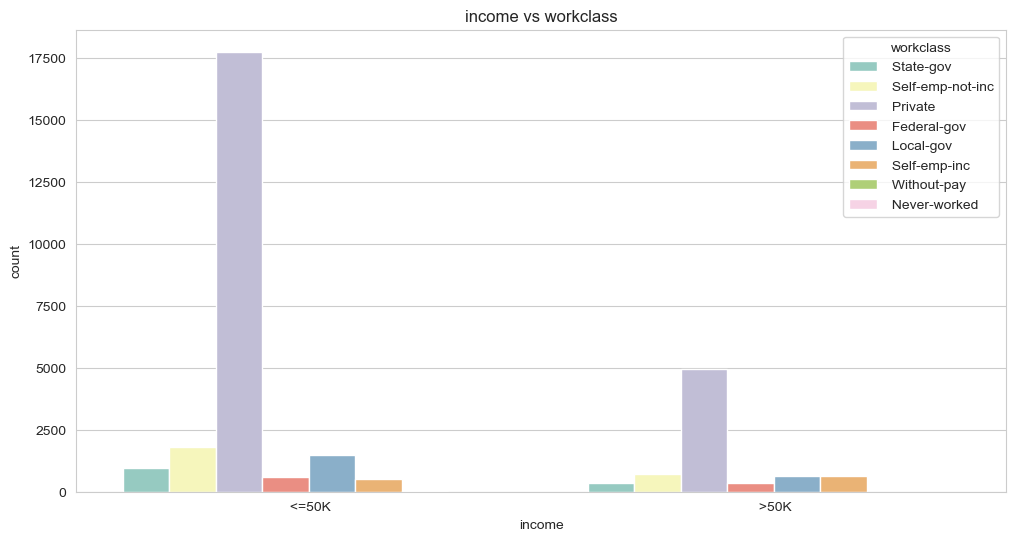

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='income', hue='workclass', palette='Set3')
plt.title('income vs workclass')

Text(0.5, 1.0, 'sex vs income')

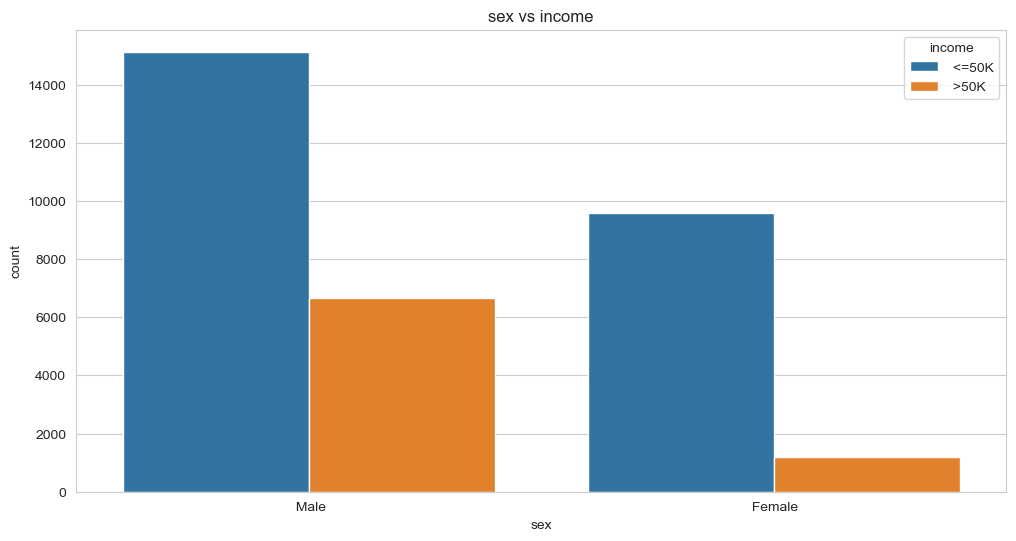

In [85]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='sex', hue='income')
plt.title('sex vs income')

In [86]:
data.groupby(['education', 'income']).size().reset_index().rename(columns={0:'#people'})

,education,income,#people
0,10th,<=50K,871
1,10th,>50K,62
2,11th,<=50K,1115
3,11th,>50K,60
4,12th,<=50K,400
5,12th,>50K,33
6,1st-4th,<=50K,162
7,1st-4th,>50K,6
8,5th-6th,<=50K,317
9,5th-6th,>50K,16


In [87]:
data.groupby(['sex', 'income']).size().reset_index().rename(columns={0: 'people'})

,sex,income,people
0,Female,<=50K,9592
1,Female,>50K,1179
2,Male,<=50K,15128
3,Male,>50K,6662


base on data plot, we can see that:
1. Income:
- from 21790 male, 15128 male have <=50K income and the rest have >50K income
- from 10771 female, 9592 female hace <=50K income and the rest have >50K income
- most <=50K income by workclass is private, and followed by self-emp-not-inc, state-gov, local-gov, state-gov, federal-gov and self-emp-inc
- most >50k income by workclass is private, followed by local-gov, self-emp-inc, self-emp-not-inc, federal-gov and state-gov

In [88]:
data_object = data.select_dtypes(include=['object'])
features_object = data_object.columns.tolist()
features_object

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [89]:
data_object

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [90]:
data_object = data_object.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
data_object

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [91]:
data_object['workclass'][data_object['workclass'] == 'Without-pay'] = 0
data_object['workclass'][data_object['workclass'] == 'Never-worked'] = 1
data_object['workclass'][data_object['workclass'] == 'Private'] = 2
data_object['workclass'][data_object['workclass'] == 'Local-gov'] = 3
data_object['workclass'][data_object['workclass'] == 'State-gov'] = 4
data_object['workclass'][data_object['workclass'] == 'Federal-gov'] = 5
data_object['workclass'][data_object['workclass'] == 'Self-emp-not-inc'] = 6
data_object['workclass'][data_object['workclass'] == 'Self-emp-inc'] = 7
data_object['workclass'].unique()

array([4, 6, 2, 5, 3, nan, 7, 0, 1], dtype=object)

In [92]:
data_object['education'][data_object['education'] == 'Preschool'] = 0 #ga sekolah
data_object['education'][data_object['education'] == '1st-4th'] = 1 #kelas 1 sampai 4
data_object['education'][data_object['education'] == '5th-6th'] = 2 #kelas 5 sampai 6
data_object['education'][data_object['education'] == '7th-8th'] = 3 #kelas 7 sampai 8
data_object['education'][data_object['education'] == '9th'] = 4 #kelas 9
data_object['education'][data_object['education'] == '10th'] = 5 #kelas 10
data_object['education'][data_object['education'] == '11th'] = 6 #kelas 11
data_object['education'][data_object['education'] == '12th'] = 7 #kelas 12
data_object['education'][data_object['education'] == 'HS-grad'] = 8 #lulusan sekolah
data_object['education'][data_object['education'] == 'Some-college'] = 9 #masih berkuliah
data_object['education'][data_object['education'] == 'Assoc-acdm'] = 10 #asosiasi degree - gelas setelah 2 tahun selesai studi penuh waktu
data_object['education'][data_object['education'] == 'Assoc-voc'] = 11 #asosiasi vocational = gelas setelah 2 tahun selesai studi vokasi
data_object['education'][data_object['education'] == 'Bachelors'] = 12 #gelar s1
data_object['education'][data_object['education'] == 'Masters'] = 13 #gelar s2
data_object['education'][data_object['education'] == 'Doctorate'] = 14 #gelar doktor
data_object['education'][data_object['education'] == 'Prof-school'] = 15 #professor
data_object['education'].unique()

array([12, 8, 6, 13, 4, 9, 10, 11, 3, 14, 15, 2, 5, 1, 0, 7], dtype=object)

In [93]:
data_object['marital-status'][data_object['marital-status'] == 'Never-married'] = 0
data_object['marital-status'][data_object['marital-status'] == 'Married-civ-spouse'] = 1
data_object['marital-status'][data_object['marital-status'] == 'Married-spouse-absent'] = 2
data_object['marital-status'][data_object['marital-status'] == 'Married-AF-spouse'] = 3
data_object['marital-status'][data_object['marital-status'] == 'Divorced'] = 4
data_object['marital-status'][data_object['marital-status'] == 'Separated'] = 5
data_object['marital-status'][data_object['marital-status'] == 'Widowed'] = 6
data_object['marital-status'].unique()

array([0, 1, 4, 2, 5, 3, 6], dtype=object)

In [94]:
data_object['occupation'][data_object['occupation'] == 'Adm-clerical'] = 0
data_object['occupation'][data_object['occupation'] == 'Exec-managerial'] = 1
data_object['occupation'][data_object['occupation'] == 'Handlers-cleaners'] = 2
data_object['occupation'][data_object['occupation'] == 'Prof-specialty'] = 3
data_object['occupation'][data_object['occupation'] == 'Other-service'] = 4
data_object['occupation'][data_object['occupation'] == 'Sales'] = 5
data_object['occupation'][data_object['occupation'] == 'Craft-repair'] = 6
data_object['occupation'][data_object['occupation'] == 'Transport-moving'] = 7
data_object['occupation'][data_object['occupation'] == 'Farming-fishing'] = 8
data_object['occupation'][data_object['occupation'] == 'Machine-op-inspct'] = 9
data_object['occupation'][data_object['occupation'] == 'Tech-support'] = 10
data_object['occupation'][data_object['occupation'] == 'Protective-serv'] = 11
data_object['occupation'][data_object['occupation'] == 'Armed-Forces'] = 12
data_object['occupation'][data_object['occupation'] == 'Priv-house-serv'] = 13
data_object['occupation'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, nan, 11, 12, 13], dtype=object)

In [95]:
data_object['relationship'][data_object['relationship'] == 'Not-in-family'] = 0
data_object['relationship'][data_object['relationship'] == 'Husband'] = 1
data_object['relationship'][data_object['relationship'] == 'Wife'] = 2
data_object['relationship'][data_object['relationship'] == 'Own-child'] = 3
data_object['relationship'][data_object['relationship'] == 'Unmarried'] = 4
data_object['relationship'][data_object['relationship'] == 'Other-relative'] = 5
data_object['relationship'].unique()

array([0, 1, 2, 3, 4, 5], dtype=object)

In [96]:
data_object['race'][data_object['race'] == 'White'] = 0
data_object['race'][data_object['race'] == 'Black'] = 1
data_object['race'][data_object['race'] == 'Asian-Pac-Islander'] = 2
data_object['race'][data_object['race'] == 'Amer-Indian-Eskimo'] = 3
data_object['race'][data_object['race'] == 'Other'] = 4
data_object['race'].unique()

array([0, 1, 2, 3, 4], dtype=object)

In [97]:
data_object['sex'][data_object['sex'] == 'Male'] = 0
data_object['sex'][data_object['sex'] == 'Female'] = 1
data_object['sex'].unique()

array([0, 1], dtype=object)

In [98]:
uniq_val = data_object['native-country'].dropna().unique()
data_object['native-country'] = data_object['native-country'].apply(lambda x: random.choice(uniq_val) if pd.isnull(x) else x)
data_object['native-country']

0        United-States
1        United-States
2        United-States
3        United-States
4                 Cuba
             ...      
32556    United-States
32557    United-States
32558    United-States
32559    United-States
32560    United-States
Name: native-country, Length: 32561, dtype: object

In [99]:
data_object['income'][data_object['income'] == '<=50K'] = 0
data_object['income'][data_object['income'] == '>50K'] = 1
data_object['income'].unique()

array([0, 1], dtype=object)

In [100]:
data_object

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,4,12,0,0,0,0,0,United-States,0
1,6,12,1,1,1,0,0,United-States,0
2,2,8,4,2,0,0,0,United-States,0
3,2,6,1,2,1,1,0,United-States,0
4,2,12,1,3,2,1,1,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,2,10,1,10,2,0,1,United-States,0
32557,2,8,1,9,1,0,0,United-States,1
32558,2,8,6,0,4,0,1,United-States,0
32559,2,8,0,0,3,0,0,United-States,0


In [101]:
uniq_val = data_object['workclass'].dropna().unique()
data_object['workclass'] = data_object['workclass'].apply(lambda x: random.choice(uniq_val) if pd.isnull(x) else x)
data_object['workclass']

0        4
1        6
2        2
3        2
4        2
        ..
32556    2
32557    2
32558    2
32559    2
32560    7
Name: workclass, Length: 32561, dtype: int64

In [102]:
uniq_val = data_object['occupation'].dropna().unique()
data_object['occupation'] = data_object['occupation'].apply(lambda x: random.choice(uniq_val) if pd.isnull(x) else x)
data_object['occupation']

0         0
1         1
2         2
3         2
4         3
         ..
32556    10
32557     9
32558     0
32559     0
32560     1
Name: occupation, Length: 32561, dtype: int64

In [103]:
data_object['native-country'] = LabelEncoder().fit_transform(data_object['native-country'])
data_object

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,4,12,0,0,0,0,0,38,0
1,6,12,1,1,1,0,0,38,0
2,2,8,4,2,0,0,0,38,0
3,2,6,1,2,1,1,0,38,0
4,2,12,1,3,2,1,1,4,0
...,...,...,...,...,...,...,...,...,...
32556,2,10,1,10,2,0,1,38,0
32557,2,8,1,9,1,0,0,38,1
32558,2,8,6,0,4,0,1,38,0
32559,2,8,0,0,3,0,0,38,0


In [104]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
features_numeric = data_numeric.columns.tolist()
features_numeric

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [105]:
data_numeric

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,39,77516,2174,0,40
1,50,83311,0,0,13
2,38,215646,0,0,40
3,53,234721,0,0,40
4,28,338409,0,0,40
...,...,...,...,...,...
32556,27,257302,0,0,38
32557,40,154374,0,0,40
32558,58,151910,0,0,40
32559,22,201490,0,0,20


In [106]:
newdata = pd.concat([data_object, data_numeric], axis=1)
newdata

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,4,12,0,0,0,0,0,38,0,39,77516,2174,0,40
1,6,12,1,1,1,0,0,38,0,50,83311,0,0,13
2,2,8,4,2,0,0,0,38,0,38,215646,0,0,40
3,2,6,1,2,1,1,0,38,0,53,234721,0,0,40
4,2,12,1,3,2,1,1,4,0,28,338409,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,2,10,1,10,2,0,1,38,0,27,257302,0,0,38
32557,2,8,1,9,1,0,0,38,1,40,154374,0,0,40
32558,2,8,6,0,4,0,1,38,0,58,151910,0,0,40
32559,2,8,0,0,3,0,0,38,0,22,201490,0,0,20


<Axes: >

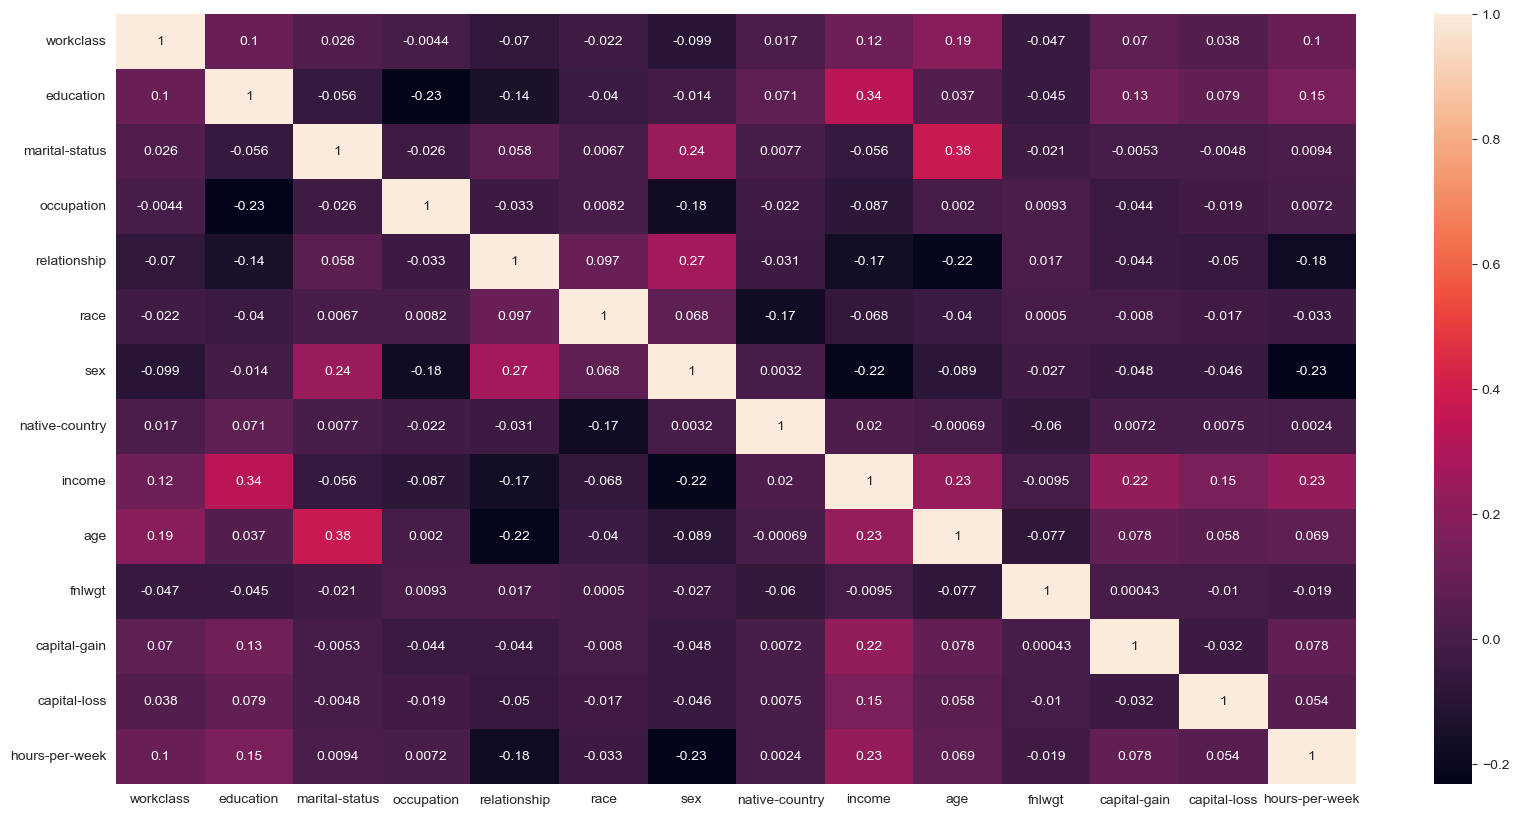

In [107]:
plt.figure(figsize=(20, 10))
sns.heatmap(newdata.corr(), annot=True)

In [108]:
newdata.dtypes

workclass          int64
education         object
marital-status    object
occupation         int64
relationship      object
race              object
sex               object
native-country     int32
income            object
age                int64
fnlwgt             int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object

In [109]:
col = ['education', 'marital-status', 'relationship', 'race', 'sex', 'income']

for i in col:
    newdata[i] = newdata[i].astype(np.int64)

In [110]:
newdata.duplicated().sum()

23

In [111]:
newdata.drop_duplicates(inplace=True)

In [112]:
newdata

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,4,12,0,0,0,0,0,38,0,39,77516,2174,0,40
1,6,12,1,1,1,0,0,38,0,50,83311,0,0,13
2,2,8,4,2,0,0,0,38,0,38,215646,0,0,40
3,2,6,1,2,1,1,0,38,0,53,234721,0,0,40
4,2,12,1,3,2,1,1,4,0,28,338409,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,2,10,1,10,2,0,1,38,0,27,257302,0,0,38
32557,2,8,1,9,1,0,0,38,1,40,154374,0,0,40
32558,2,8,6,0,4,0,1,38,0,58,151910,0,0,40
32559,2,8,0,0,3,0,0,38,0,22,201490,0,0,20


In [113]:
newdata.describe().T

,count,mean,std,min,25%,50%,75%,max
workclass,32538.0,2.797560,1.540127,0.0,2.0,2.0,3.00,7.0
education,32538.0,9.096472,2.587404,0.0,8.0,9.0,11.00,15.0
marital-status,32538.0,1.374454,1.642791,0.0,0.0,1.0,1.00,6.0
occupation,32538.0,4.393847,3.145907,0.0,2.0,4.0,6.00,13.0
relationship,32538.0,1.542811,1.437459,0.0,0.0,1.0,3.00,5.0
race,32538.0,0.221771,0.627452,0.0,0.0,0.0,0.00,4.0
sex,32538.0,0.330752,0.470491,0.0,0.0,0.0,1.00,1.0
native-country,32538.0,36.099330,6.611997,0.0,38.0,38.0,38.00,40.0
income,32538.0,0.240918,0.427647,0.0,0.0,0.0,0.00,1.0
age,32538.0,38.585285,13.637857,17.0,28.0,37.0,48.00,90.0


In [114]:
from scipy.stats import stats


def quartileFunc(column, bins):
    print("\nQuartile of " + column)
    print("----------------------------------------------------------------------------")
    Q1=newdata[column].quantile(q=0.25)
    Q3=newdata[column].quantile(q=0.75)
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(newdata[column]))

    print("\nOutlier detection from Interquartile range (IQR) " + column)
    print("----------------------------------------------------------------------------")
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('\nLower outliers range: ', L_outliers)
    print('\nUpper outliers range: ', U_outliers)
    print('Number of outliers in upper : ', newdata[newdata[column]>U_outliers][column].count())
    print('Number of outliers in lower : ', newdata[newdata[column]<L_outliers][column].count())
    print('% of Outlier in upper: ',round(newdata[newdata[column]>U_outliers][column].count()*100/len(newdata)), '%')
    print('% of Outlier in lower: ',round(newdata[newdata[column]<L_outliers][column].count()*100/len(newdata)), '%')
    

In [115]:
df_num = newdata.select_dtypes(include=['float64', 'int64'])
len(df_num.columns.values)

13

In [116]:
for x in df_num.columns:
    quartileFunc(x,20)


Quartile of workclass
----------------------------------------------------------------------------
1st Quartile (Q1) is:  2.0
3st Quartile (Q3) is:  3.0
Interquartile range (IQR) is  1.0

Outlier detection from Interquartile range (IQR) workclass
----------------------------------------------------------------------------

Lower outliers range:  0.5

Upper outliers range:  4.5
Number of outliers in upper :  5287
Number of outliers in lower :  228
% of Outlier in upper:  16 %
% of Outlier in lower:  1 %

Quartile of education
----------------------------------------------------------------------------
1st Quartile (Q1) is:  8.0
3st Quartile (Q3) is:  11.0
Interquartile range (IQR) is  3.0

Outlier detection from Interquartile range (IQR) education
----------------------------------------------------------------------------

Lower outliers range:  3.5

Upper outliers range:  15.5
Number of outliers in upper :  0
Number of outliers in lower :  1193
% of Outlier in upper:  0 %
% of Outlie

In [117]:
c = newdata.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)
so=so[(so<1) & (so>0.2)].drop_duplicates().to_frame()
so.columns = ['correlation']
so

correlation
marital-status age                0.378135
education      income             0.335946
sex            relationship       0.273584
               marital-status     0.242644
income         age                0.234045
occupation     education          0.231297
income         hours-per-week     0.229658
hours-per-week sex                0.229185
capital-gain   income             0.223338
relationship   age                0.217981
income         sex                0.215954